In [61]:
import pandas as pd
from minio import Minio
from io import BytesIO

minio_client = Minio(
    "localhost:9000",  # Ganti dengan alamat MinIO Anda
    access_key="minio_access_key",  # Ganti dengan access key MinIO Anda
    secret_key="minio_secret_key",  # Ganti dengan secret key MinIO Anda
    secure=False  # Jika menggunakan HTTP, set secure=False
)

bucket_name = "merged-bank-data"  # Ganti dengan nama bucket yang sesuai

# Nama file yang ingin dibaca
file_name = "all_bank_data.csv"

# Mengambil objek CSV dari MinIO
data = minio_client.get_object(bucket_name, file_name)

# Membaca file CSV ke dalam DataFrame menggunakan pandas
df = pd.read_csv(data)

print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


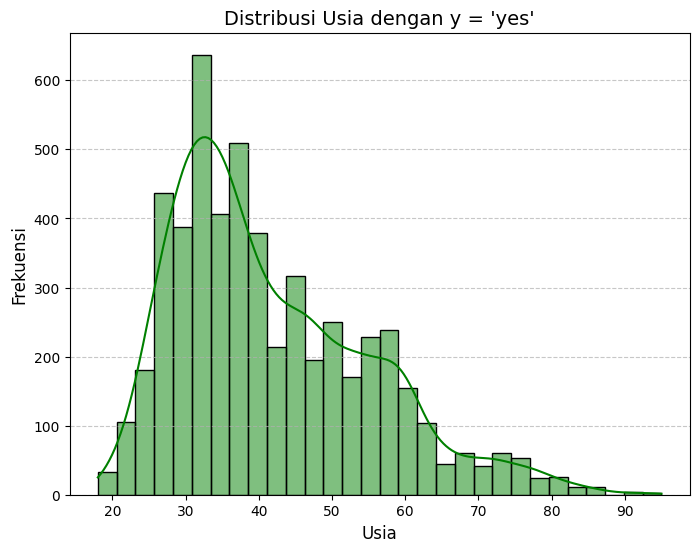

Frekuensi setiap usia dengan y = 'yes':
age
18     7
19    11
20    15
21    22
22    40
      ..
87     3
90     2
92     2
93     2
95     1
Name: count, Length: 74, dtype: int64
Usia yang paling sering memiliki y = 'yes': 32 (221 kali)


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data berdasarkan y = 'yes'
yes_data = df[df['y'] == 'yes']

# Visualisasi distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(data=yes_data, x='age', bins=30, kde=True, color='green', edgecolor='black')
plt.title("Distribusi Usia dengan y = 'yes'", fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hitung jumlah masing-masing usia dengan y = 'yes'
age_counts = yes_data['age'].value_counts().sort_index()

# Tampilkan usia yang memiliki y = 'yes' beserta jumlahnya
print("Frekuensi setiap usia dengan y = 'yes':")
print(age_counts)

# Jika ingin mengetahui usia yang paling sering memiliki y = 'yes'
most_common_age = age_counts.idxmax()
print(f"Usia yang paling sering memiliki y = 'yes': {most_common_age} ({age_counts[most_common_age]} kali)")


In [43]:
print(f"Jumlah baris dan kolom: {df.shape}")

# Menampilkan tipe data setiap kolom
print(f"Tipe data setiap kolom:\n{df.dtypes}")

Jumlah baris dan kolom: (45210, 17)
Tipe data setiap kolom:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [44]:
import pandas as pd

# Categorical columns
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "pdays", "contact", "month", "poutcome", "y"]

# Tampilkan distribusi untuk kolom kategori
for col in categorical_columns:
    print(f"Distribusi untuk kolom: {col}")
    print(df[col].value_counts())  # Menampilkan distribusi frekuensi
    print()  # Baris kosong untuk pemisah

# Numerical columns
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous", "y"]

# Tampilkan statistik deskriptif untuk kolom numerik
for col in numerical_columns:
    print(f"Statistik deskriptif untuk kolom: {col}")
    print(df[col].describe())  # Statistik deskriptif
    print()  # Baris kosong untuk pemisah


Distribusi untuk kolom: job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Distribusi untuk kolom: marital
marital
married     27213
single      12790
divorced     5207
Name: count, dtype: int64

Distribusi untuk kolom: education
education
secondary    23201
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Distribusi untuk kolom: default
default
no     44395
yes      815
Name: count, dtype: int64

Distribusi untuk kolom: housing
housing
yes    25130
no     20080
Name: count, dtype: int64

Distribusi untuk kolom: loan
loan
no     37966
yes     7244
Name: count, dtype: int64

Distribusi untuk kolom: pdays
pdays
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 756        1
 7

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26384\927058490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26384\927058490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26384\927058490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

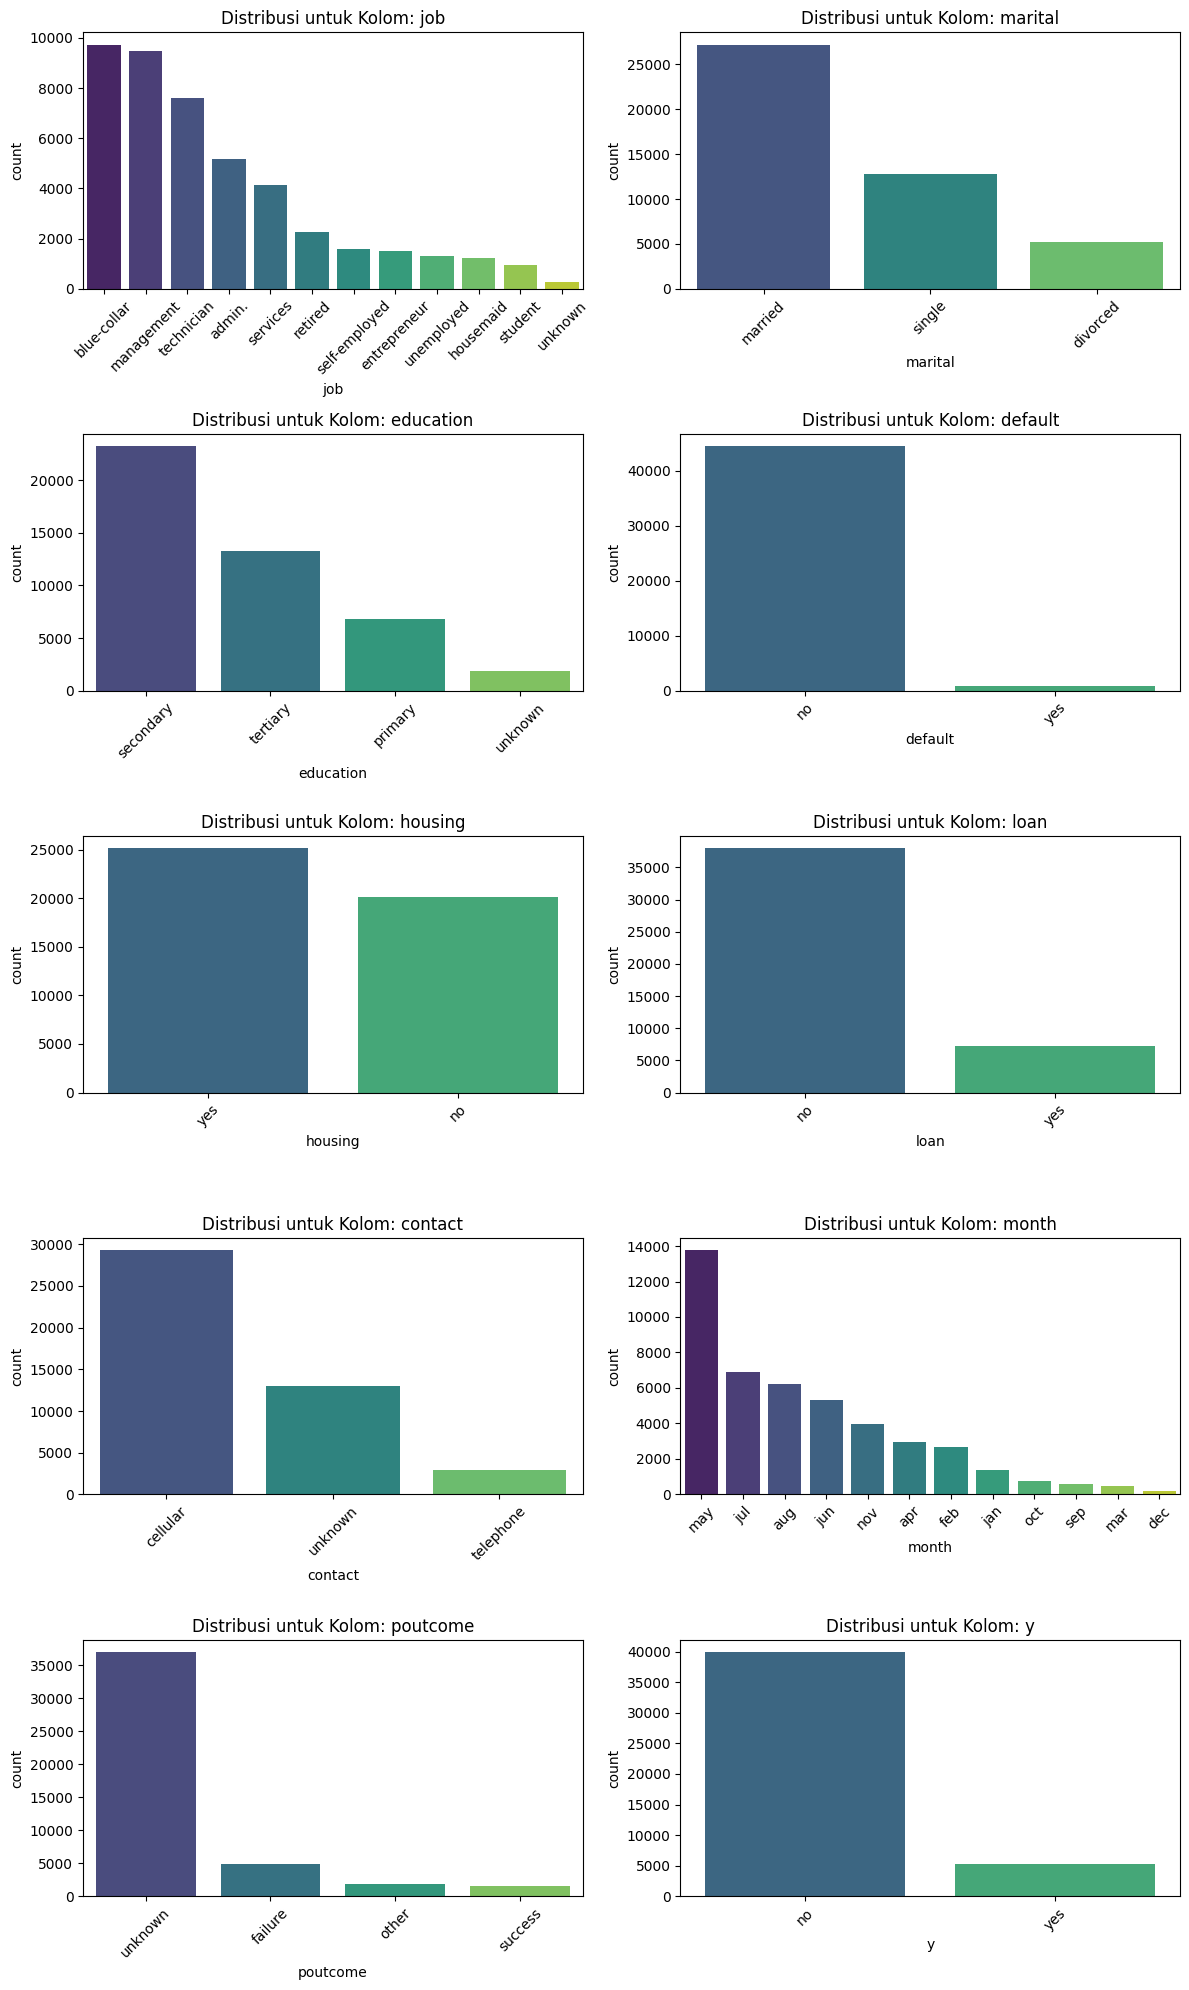

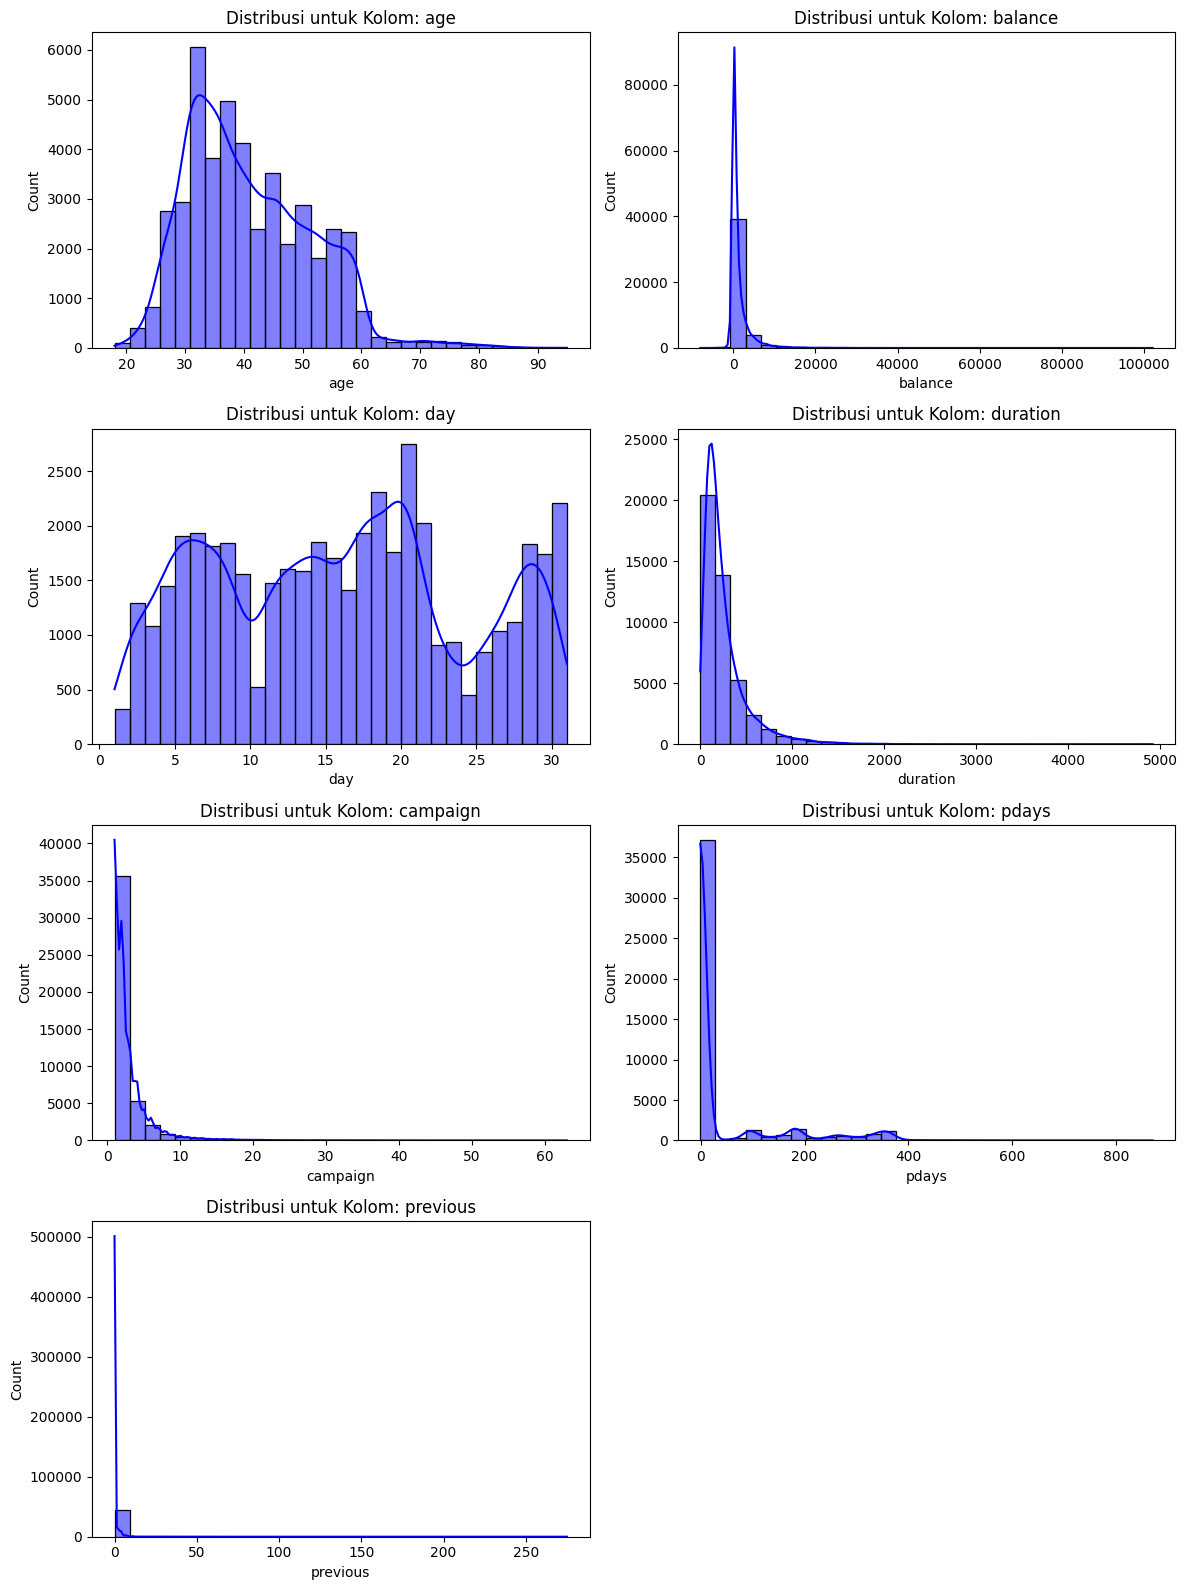

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# Kolom kategori
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

# Menentukan jumlah grafik per baris
num_cols = 2  # Jumlah grafik per baris
num_rows = ceil(len(categorical_columns) / num_cols)  # Hitung jumlah baris

# Membuat subplots untuk kolom kategorikal
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Flattening untuk iterasi yang lebih mudah

# Visualisasi distribusi untuk kolom kategorikal
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribusi untuk Kolom: {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika jumlah grafik kurang dari subplot yang tersedia
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Kolom numerik
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Menentukan jumlah grafik per baris untuk kolom numerik
num_rows = ceil(len(numerical_columns) / num_cols)  # Hitung jumlah baris

# Membuat subplots untuk kolom numerik
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Flattening untuk iterasi yang lebih mudah

# Visualisasi distribusi untuk kolom numerik
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True, bins=30, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribusi untuk Kolom: {col}")

# Hapus subplot kosong jika jumlah grafik kurang dari subplot yang tersedia
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [45]:
columns_to_drop = ['day', 'month', 'pdays', 'contact', 'previous']

# Menghapus kolom-kolom dari DataFrame
data_dropped = df.drop(columns=columns_to_drop)

# Tampilkan hasil setelah drop
data_dropped.head(15)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,unknown,no
5,35,management,married,tertiary,no,231,yes,no,139,1,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,380,1,unknown,no
8,58,retired,married,primary,no,121,yes,no,50,1,unknown,no
9,43,technician,single,secondary,no,593,yes,no,55,1,unknown,no


In [46]:
import pandas as pd

# Tentukan urutan kategori yang diinginkan
job_map = {
    "student": 2,
    "admin.": 5,
    "management": 10,
    "unemployed": 1,
    "retired": 3,
    "housemaid": 4,
    "entrepreneur": 11,
    "blue-collar": 7,
    "self-employed": 6,
    "technician": 9,
    "services": 8,
    "unknown": 0
}

marital_map = {
    "married": 1,
    "divorced": 2,
    "single": 0
}

education_map = {
    "unknown": 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

default_map = {
    "yes": 1,
    "no": 0
}

housing_map = {
    "yes": 1,
    "no": 0
}

loan_map = {
    "yes": 1,
    "no": 0
}

poutcome_map = {
    "unknown": 0,
    "other": 1,
    "failure": 2,
    "success": 3
}

y_map = {
    "yes": 1,
    "no": 0
}

# Fungsi untuk melakukan encoding manual
def encode_column(df, column_name, mapping):
    return df[column_name].map(mapping).fillna(-1)  # Menggunakan -1 untuk nilai yang tidak ada di mapping

# Terapkan mapping manual ke kolom-kolom yang diinginkan
data_dropped["job_encoded"] = encode_column(data_dropped, "job", job_map)
data_dropped["marital_encoded"] = encode_column(data_dropped, "marital", marital_map)
data_dropped["education_encoded"] = encode_column(data_dropped, "education", education_map)
data_dropped["default_encoded"] = encode_column(data_dropped, "default", default_map)
data_dropped["housing_encoded"] = encode_column(data_dropped, "housing", housing_map)
data_dropped["loan_encoded"] = encode_column(data_dropped, "loan", loan_map)
data_dropped["poutcome_encoded"] = encode_column(data_dropped, "poutcome", poutcome_map)
data_dropped["y_encoded"] = encode_column(data_dropped, "y", y_map)

# Tampilkan hasil encoding
data_dropped[[
    "job", "job_encoded",
    "marital", "marital_encoded",
    "education", "education_encoded",
    "default", "default_encoded",
    "housing", "housing_encoded",
    "loan", "loan_encoded",
    "poutcome", "poutcome_encoded",
    "y", "y_encoded"
]].head(15)

# Hapus kolom asli setelah encoding
columns_to_drop = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
data_dropped = data_dropped.drop(columns=columns_to_drop)

# Tampilkan hasil setelah drop
data_dropped.head(15)


,age,balance,duration,campaign,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,poutcome_encoded,y_encoded
0,58,2143,261,1,10,1,3,0,1,0,0,0
1,44,29,151,1,9,0,2,0,1,0,0,0
2,33,2,76,1,11,1,2,0,1,1,0,0
3,47,1506,92,1,7,1,0,0,1,0,0,0
4,33,1,198,1,0,0,0,0,0,0,0,0
5,35,231,139,1,10,1,3,0,1,0,0,0
6,28,447,217,1,10,0,3,0,1,1,0,0
7,42,2,380,1,11,2,3,1,1,0,0,0
8,58,121,50,1,3,1,1,0,1,0,0,0
9,43,593,55,1,9,0,2,0,1,0,0,0


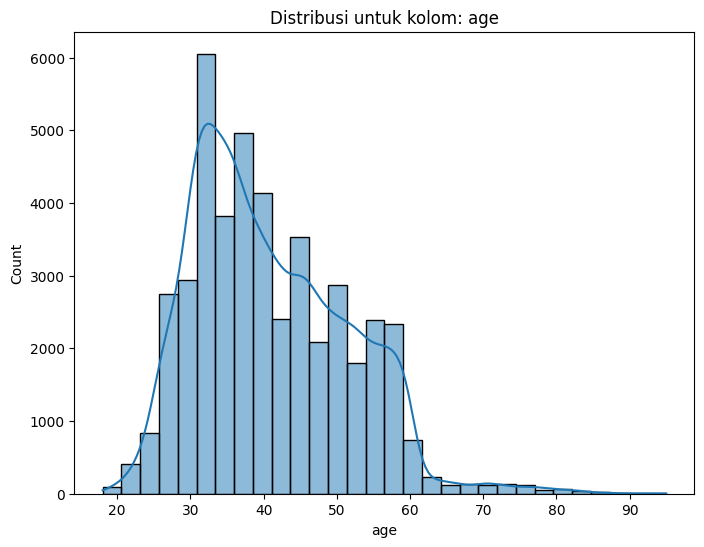

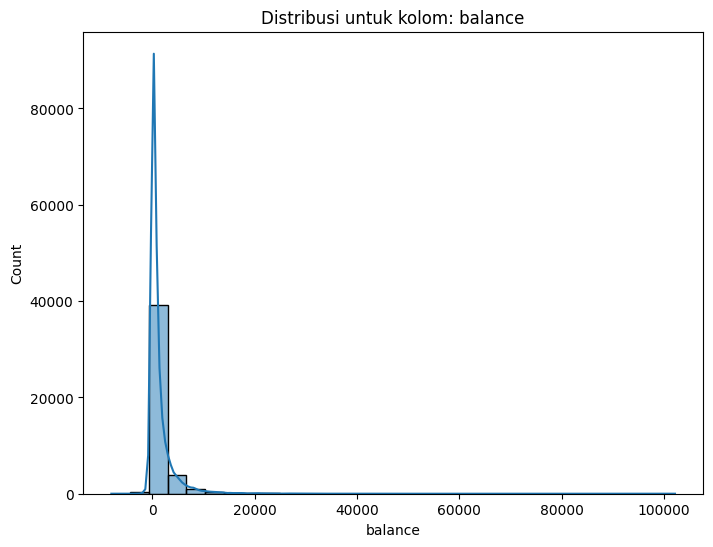

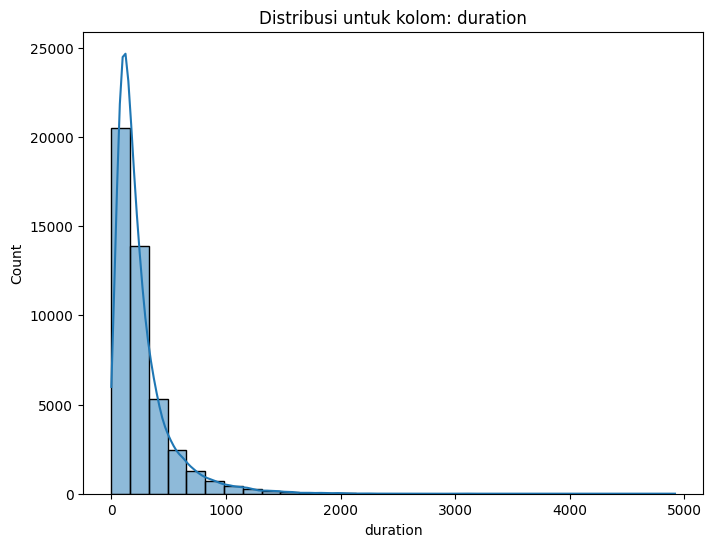

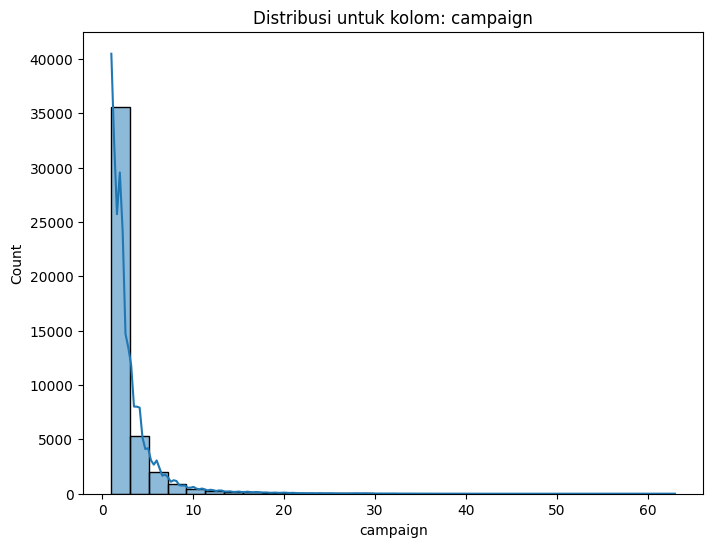

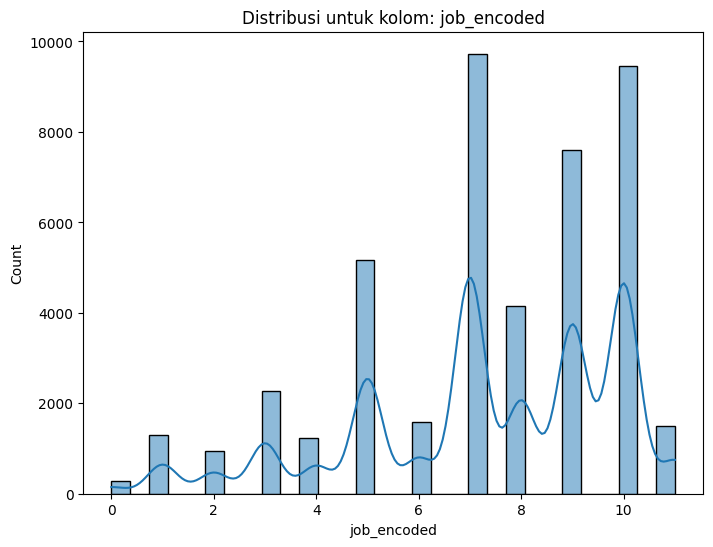

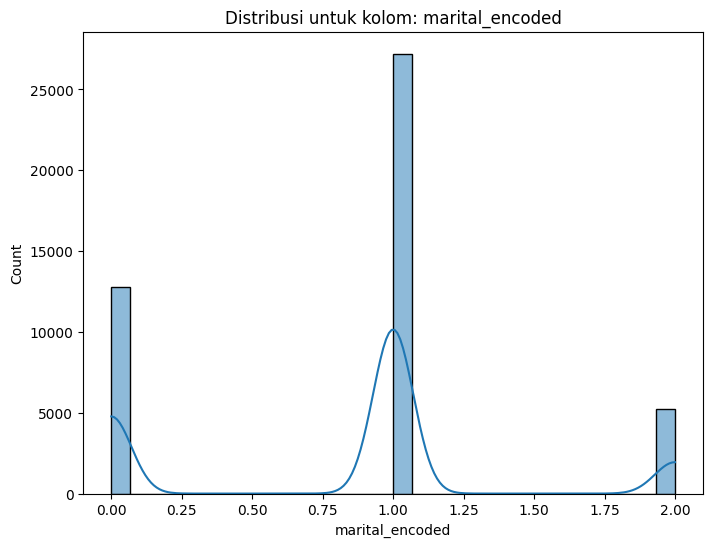

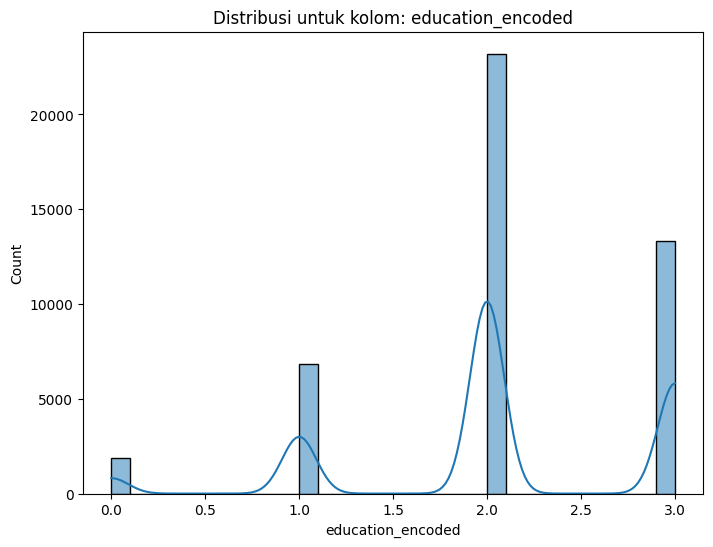

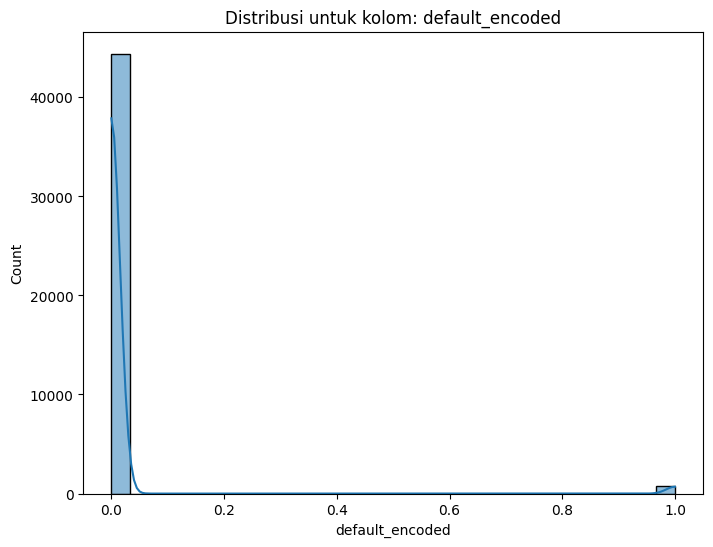

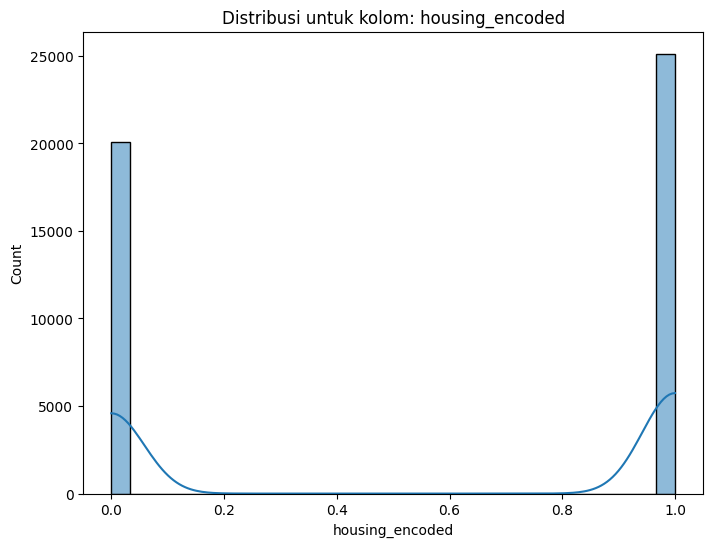

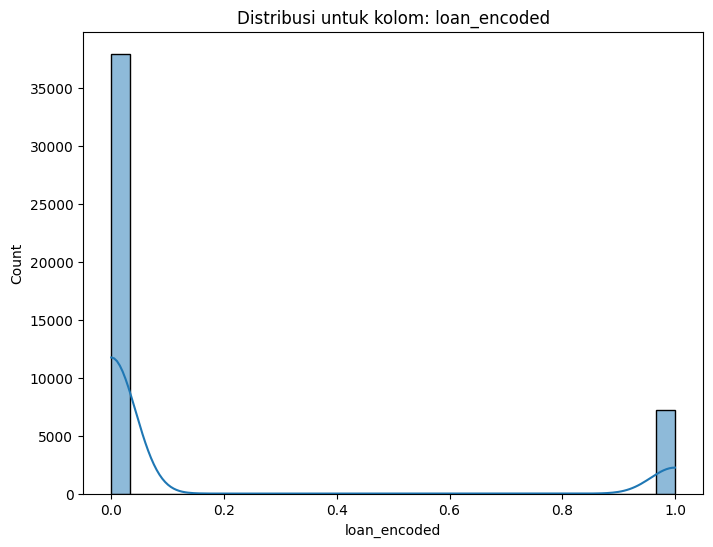

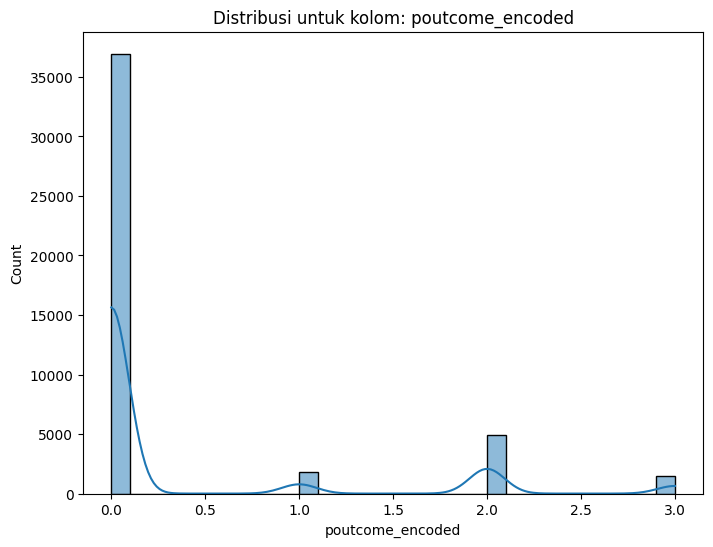

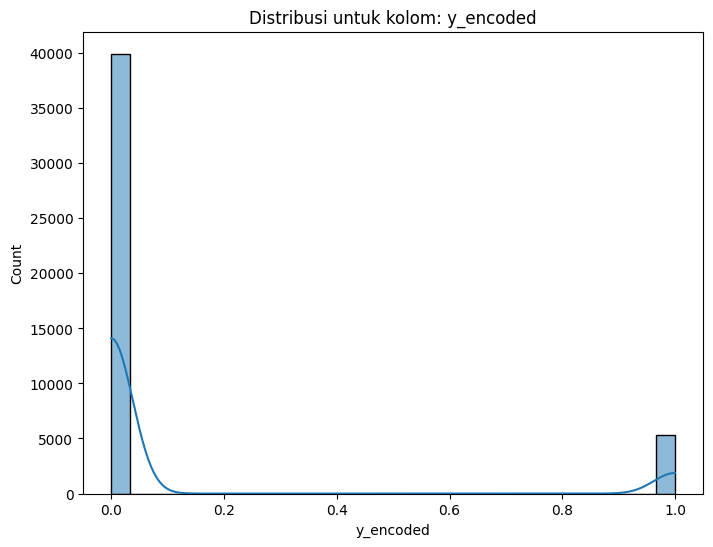

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi untuk setiap kolom numerik
numerical_columns = data_dropped.select_dtypes(include=['float64', 'int64']).columns  # Mengambil kolom numerik

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_dropped[col], kde=True, bins=30)
    plt.title(f"Distribusi untuk kolom: {col}")
    plt.show()


In [48]:
# Ambil semua baris dengan y_encoded = 1
df_y1 = data_dropped[data_dropped['y_encoded'] == 1]

# Ambil 30% dari baris dengan y_encoded = 0 secara acak
df_y0 = data_dropped[data_dropped['y_encoded'] == 0].sample(frac=0.3, random_state=42)

# Gabungkan kedua dataframe
final_df = pd.concat([df_y1, df_y0])

# Tampilkan skema (tipe data setiap kolom)
print(final_df.dtypes)

# Tampilkan jumlah baris data
print(f'Jumlah baris data: {final_df.shape[0]}')

# Tampilkan 15 baris pertama
print(final_df.head(15))


age                  int64
balance              int64
duration             int64
campaign             int64
job_encoded          int64
marital_encoded      int64
education_encoded    int64
default_encoded      int64
housing_encoded      int64
loan_encoded         int64
poutcome_encoded     int64
y_encoded            int64
dtype: object
Jumlah baris data: 17265
     age  balance  duration  campaign  job_encoded  marital_encoded  \
83    59     2343      1042         1            5                1   
86    56       45      1467         1            5                1   
87    41     1270      1389         1            9                1   
129   55     2476       579         1            8                1   
168   54      184       673         2            5                1   
270   42        0       562         2           10                0   
388   56      830      1201         1           10                1   
390   60      545      1030         1            3                2  

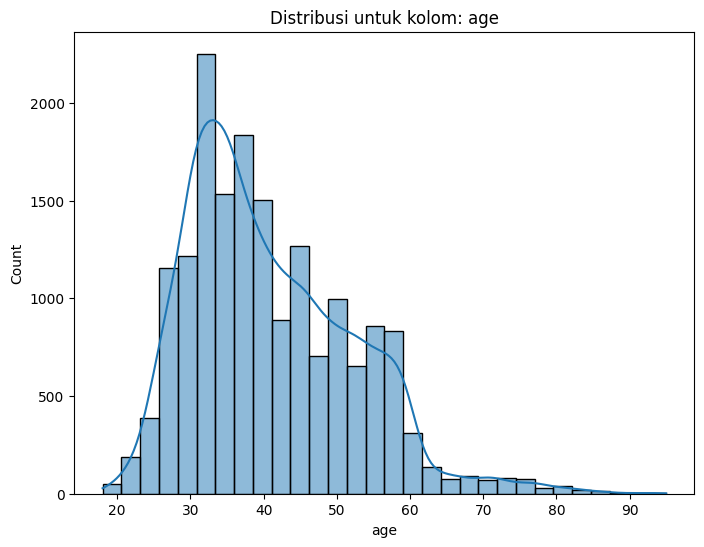

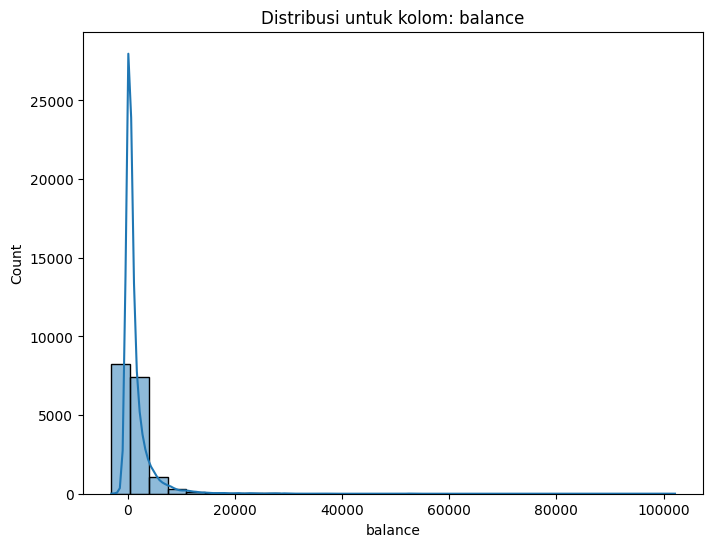

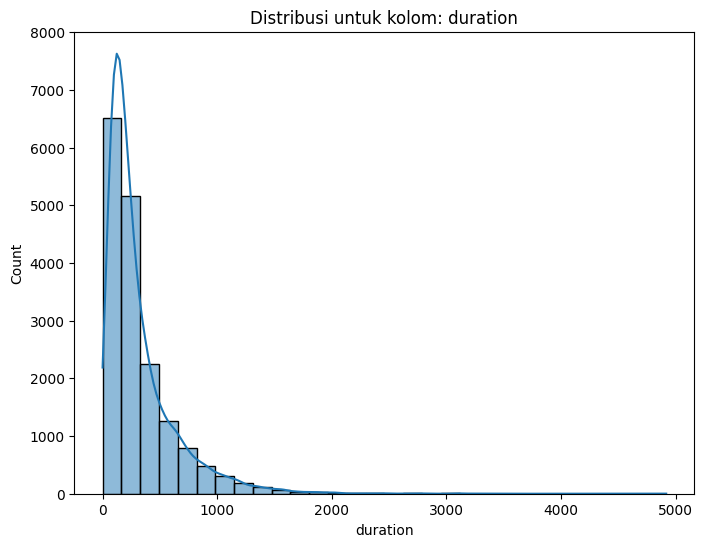

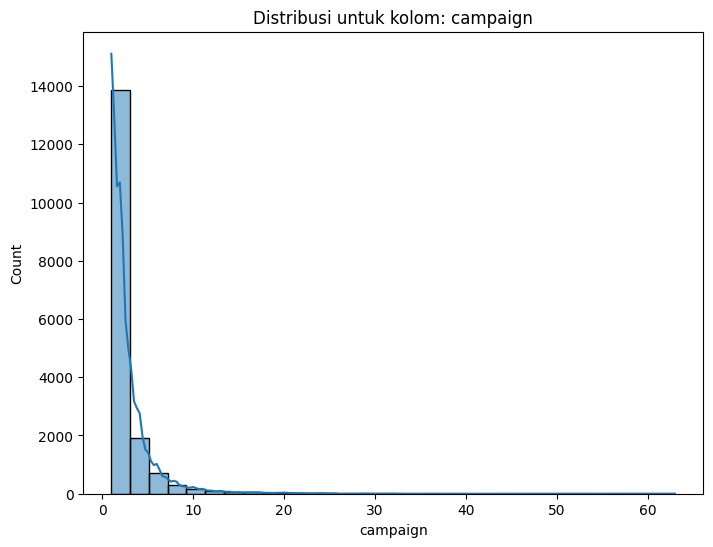

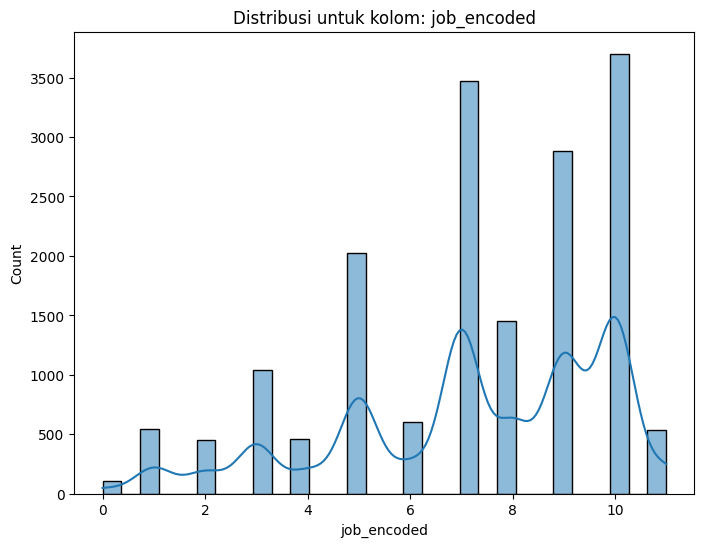

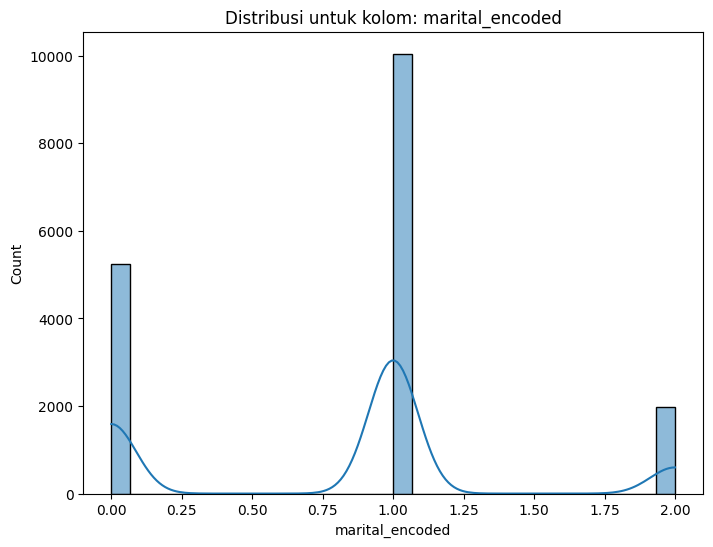

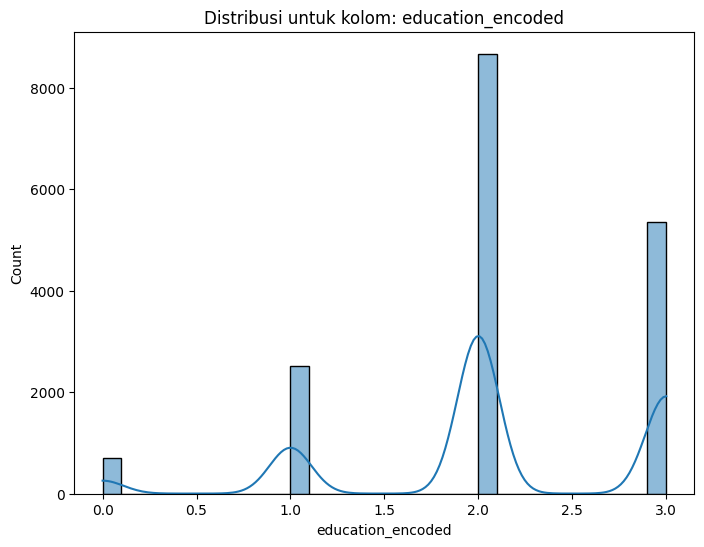

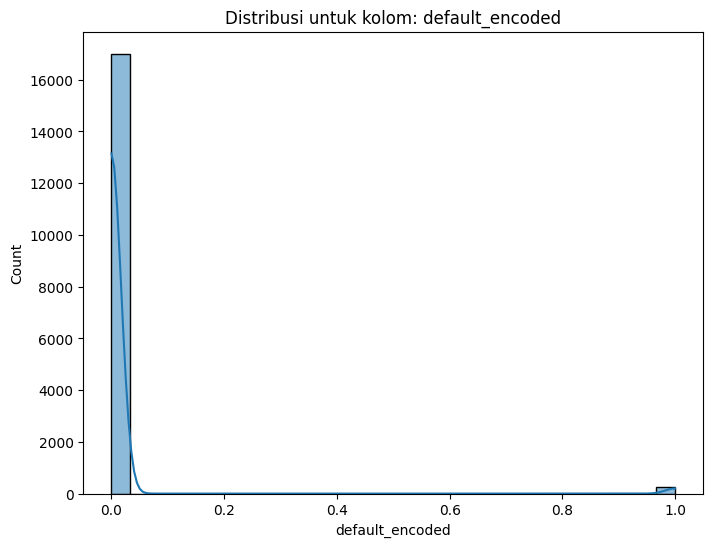

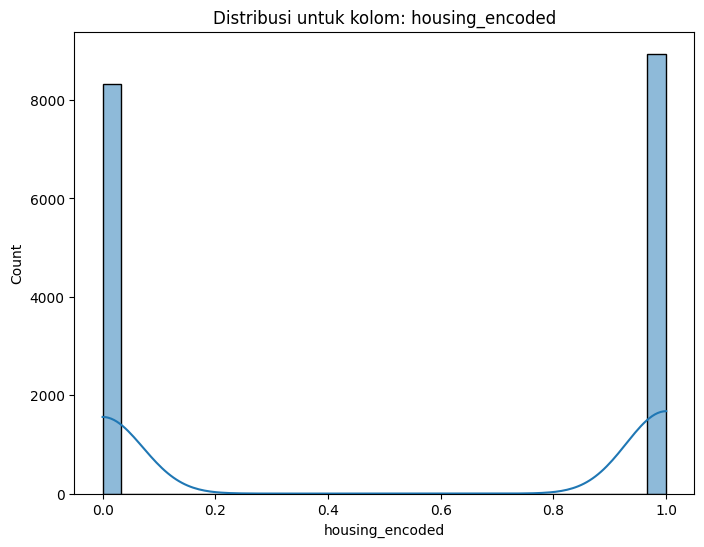

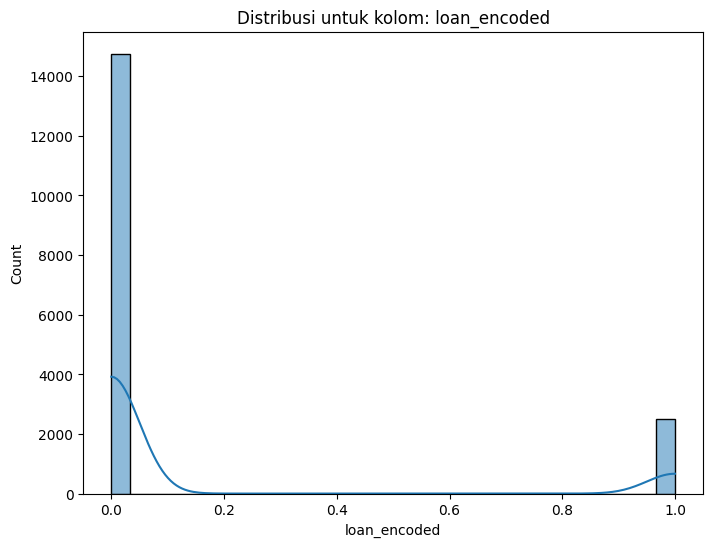

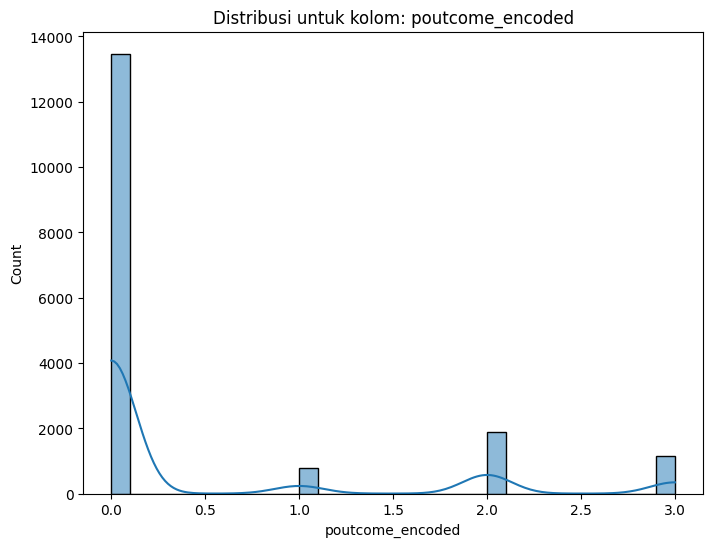

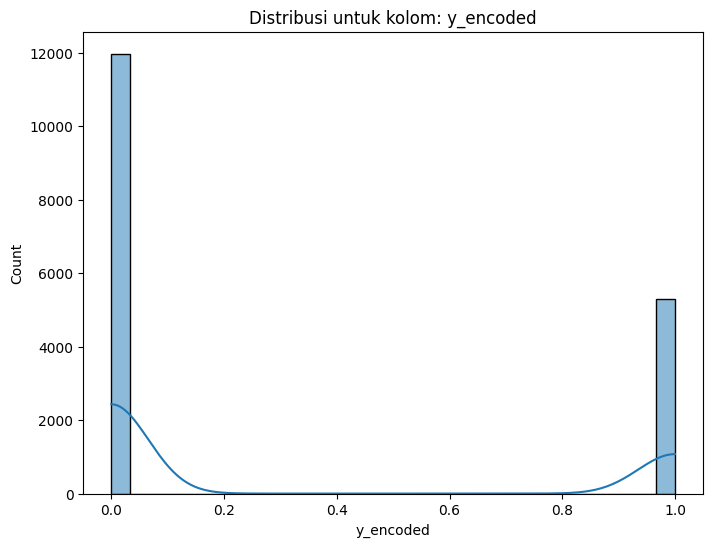

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi dataframe PySpark ke pandas untuk visualisasi
# Visualisasi distribusi untuk setiap kolom numerik
for col in final_df:
    plt.figure(figsize=(8, 6))
    sns.histplot(final_df[col], kde=True, bins=30)
    plt.title(f"Distribusi untuk kolom: {col}")
    plt.show()


In [50]:
# Tentukan kolom yang ingin dihapus
columns_to_drop = ['default_encoded','poutcome_encoded']  # Ganti dengan nama kolom yang ingin dihapus

# Hapus kolom yang tidak diinginkan
final_df = final_df.drop(columns=columns_to_drop)

# Tampilkan hasil setelah drop
final_df.head(15)  # Tampilkan 15 baris pertama

# Menampilkan jumlah baris pada DataFrame
num_rows = final_df.shape[0]
print(f"Jumlah baris dalam DataFrame: {num_rows}")


Jumlah baris dalam DataFrame: 17265


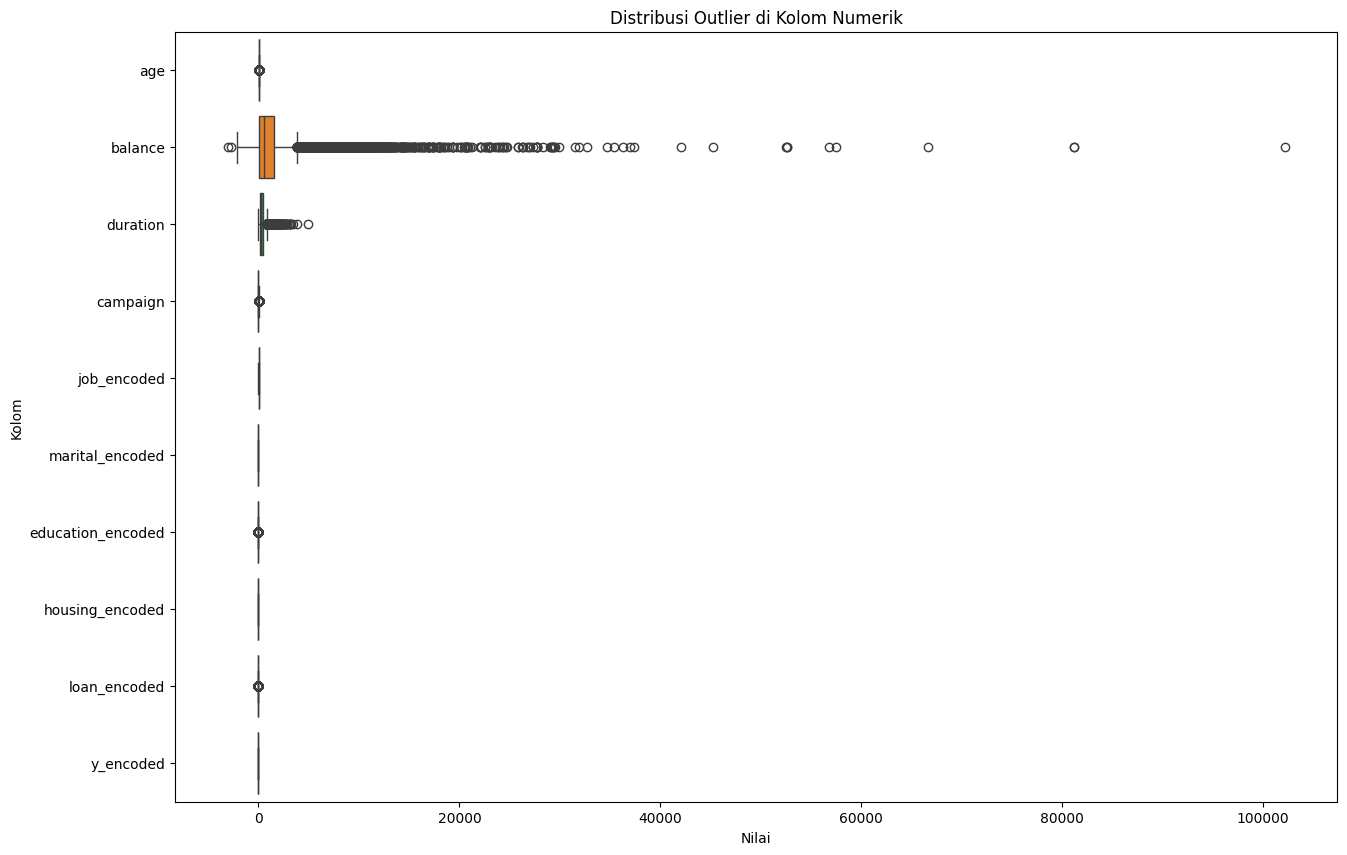

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=final_df, orient="h")
plt.yticks(rotation=0)  # Nama kolom di sumbu y
plt.title("Distribusi Outlier di Kolom Numerik")
plt.xlabel("Nilai")  # Label sumbu x
plt.ylabel("Kolom")  # Label sumbu y
plt.show()


In [23]:
# Statistik deskriptif untuk beberapa kolom
stats = final_df[['balance', 'duration', 'campaign']].describe()
print(stats)


             balance      duration      campaign
count   17265.000000  17265.000000  17265.000000
mean     1445.446858    318.740226      2.611584
std      3145.363515    314.538000      2.798733
min     -3058.000000      0.000000      1.000000
25%        96.000000    119.000000      1.000000
50%       501.000000    215.000000      2.000000
75%      1585.000000    402.000000      3.000000
max    102127.000000   4918.000000     63.000000


In [51]:
from functools import reduce

# Membuat kondisi untuk semua kolom numerik (nilai harus >= 0)
numeric_cols = [col for col in final_df.columns if final_df[col].dtype in ['float64', 'int64']]

# Membuat kondisi untuk memeriksa nilai >= 0 pada setiap kolom numerik
condition = [final_df[col] >= 0 for col in numeric_cols]

# Menggabungkan semua kondisi dengan AND
final_df = final_df[reduce(lambda a, b: a & b, condition)]

# Menampilkan statistik deskriptif untuk DataFrame setelah filter
stats = final_df.describe()

# Menampilkan statistik
print(stats)

# Menampilkan jumlah baris dalam DataFrame setelah filter
print("Jumlah baris data sekarang:", final_df.shape[0])


                age        balance      duration      campaign   job_encoded  \
count  16005.000000   16005.000000  16005.000000  16005.000000  16005.000000   
mean      41.032552    1583.405936    319.221431      2.590503      7.220993   
std       11.417226    3225.438864    313.670962      2.748499      2.666984   
min       18.000000       0.000000      0.000000      1.000000      0.000000   
25%       32.000000     166.000000    119.000000      1.000000      5.000000   
50%       39.000000     592.000000    217.000000      2.000000      7.000000   
75%       49.000000    1730.000000    403.000000      3.000000     10.000000   
max       95.000000  102127.000000   4918.000000     63.000000     11.000000   

       marital_encoded  education_encoded  housing_encoded  loan_encoded  \
count     16005.000000       16005.000000     16005.000000  16005.000000   
mean          0.805561           2.091409         0.501218      0.130522   
std           0.614786           0.789651         0

In [52]:
import pandas as pd

# Fungsi untuk menghitung batas outlier dan kuartil
def detect_outliers(df, col, custom_iqr=None):
    # Menghitung kuartil
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.5)  # Median atau Q2
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = 0  # Batas bawah
    upper_bound = q3 + (custom_iqr if custom_iqr else 1.5) * iqr  # Batas atas
    return q1, q2, q3, lower_bound, upper_bound

# Kolom yang ingin dianalisis
selected_cols = ["balance", "age", "campaign", "duration"]  # Gantilah dengan kolom lain yang relevan

# Pisahkan data berdasarkan nilai y_encoded
data_y0 = final_df[final_df['y_encoded'] == 0].copy()  # Baris dengan y_encoded == 0
data_y_other = final_df[final_df['y_encoded'] != 0].copy()  # Baris dengan y_encoded != 0

# Filter dan hapus outlier untuk baris di mana y_encoded == 0
for col in selected_cols:
    try:
        # Khusus untuk 'balance', tentukan custom_iqr yang lebih tinggi (misalnya 1.5 kali IQR)
        custom_iqr = 0.1 if col == "balance" else None
        
        q1, q2, q3, lb, ub = detect_outliers(data_y0, col, custom_iqr)  # Menghitung kuartil dan batas
        print(f"Kolom: {col}")
        print(f"Q1 (Kuartil 1): {q1}")
        print(f"Q2 (Median): {q2}")
        print(f"Q3 (Kuartil 3): {q3}")
        print(f"Batas bawah: {lb}, Batas atas: {ub}")

        # Hapus baris yang merupakan outlier
        data_y0 = data_y0[(data_y0[col] >= lb) & (data_y0[col] <= ub)]
        
        # Menampilkan jumlah baris setelah menghapus outlier
        print(f"Jumlah baris setelah menghapus outlier di kolom {col} (y_encoded == 0): {data_y0.shape[0]}\n")
    
    except Exception as e:
        print(f"Error dalam menghitung outlier untuk kolom {col}: {str(e)}")

# Gabungkan kembali data yang telah difilter dengan data lain
filtered_data = pd.concat([data_y0, data_y_other])

# Tampilkan jumlah baris setelah semua penghapusan outlier
print(f"Jumlah baris setelah menghapus semua outlier: {filtered_data.shape[0]}")


Kolom: balance
Q1 (Kuartil 1): 133.0
Q2 (Median): 513.0
Q3 (Kuartil 3): 1492.75
Batas bawah: 0, Batas atas: 1628.725
Jumlah baris setelah menghapus outlier di kolom balance (y_encoded == 0): 8380

Kolom: age
Q1 (Kuartil 1): 32.0
Q2 (Median): 38.0
Q3 (Kuartil 3): 47.0
Batas bawah: 0, Batas atas: 69.5
Jumlah baris setelah menghapus outlier di kolom age (y_encoded == 0): 8324

Kolom: campaign
Q1 (Kuartil 1): 1.0
Q2 (Median): 2.0
Q3 (Kuartil 3): 3.0
Batas bawah: 0, Batas atas: 6.0
Jumlah baris setelah menghapus outlier di kolom campaign (y_encoded == 0): 7709

Kolom: duration
Q1 (Kuartil 1): 98.0
Q2 (Median): 167.0
Q3 (Kuartil 3): 283.0
Batas bawah: 0, Batas atas: 560.5
Jumlah baris setelah menghapus outlier di kolom duration (y_encoded == 0): 7216

Jumlah baris setelah menghapus semua outlier: 12295


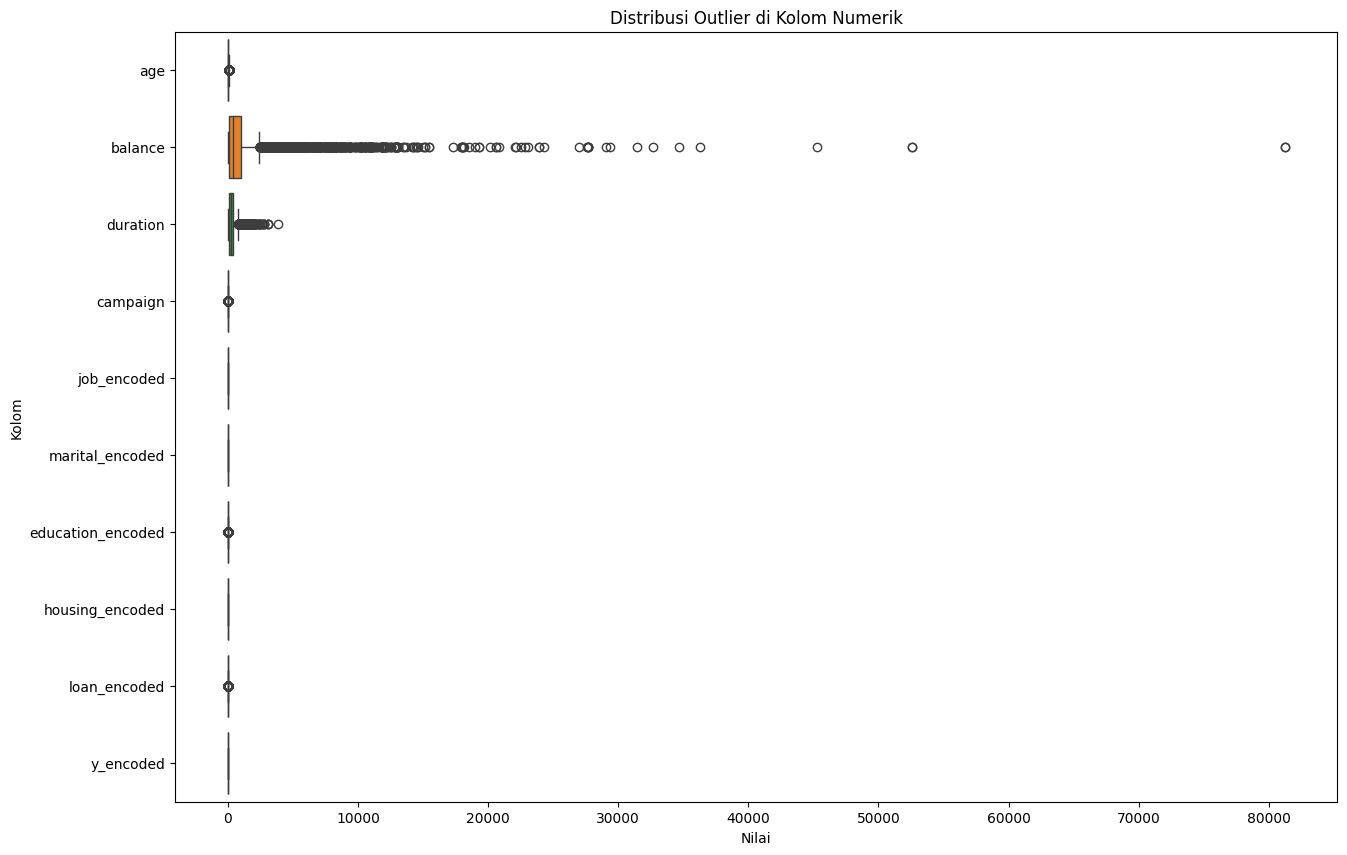

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=filtered_data, orient="h")
plt.yticks(rotation=0)  # Nama kolom di sumbu y
plt.title("Distribusi Outlier di Kolom Numerik")
plt.xlabel("Nilai")  # Label sumbu x
plt.ylabel("Kolom")  # Label sumbu y
plt.show()

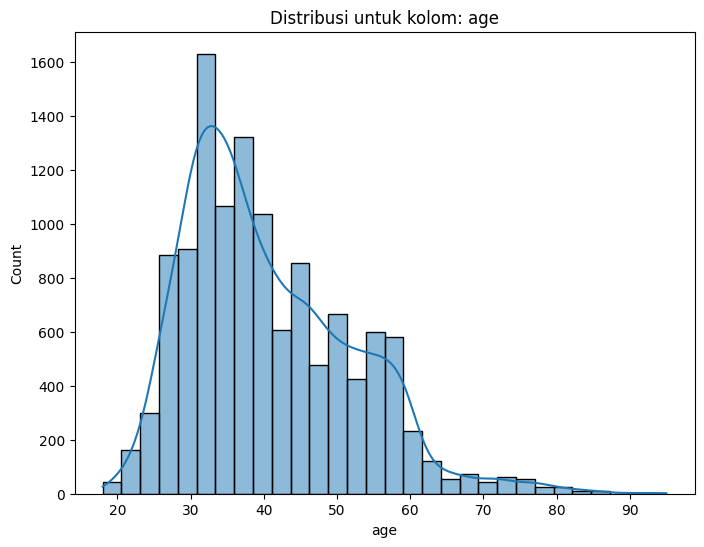

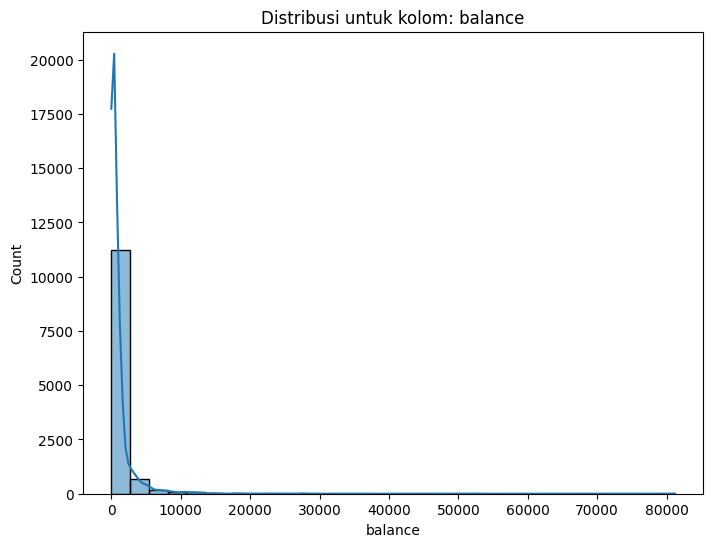

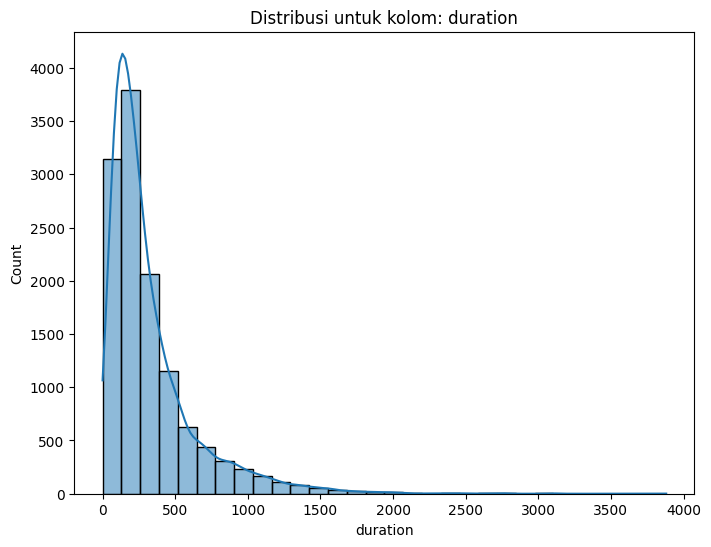

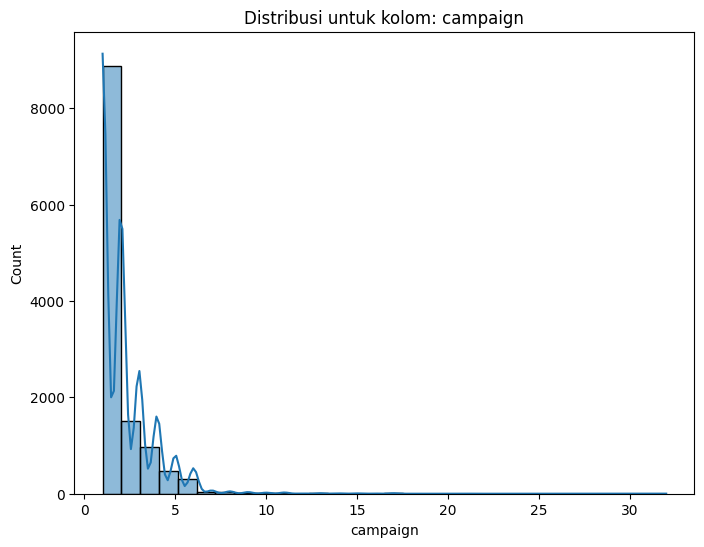

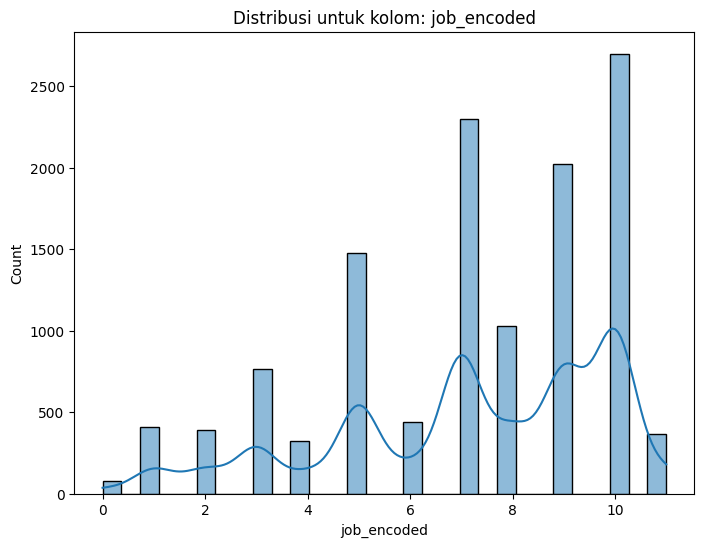

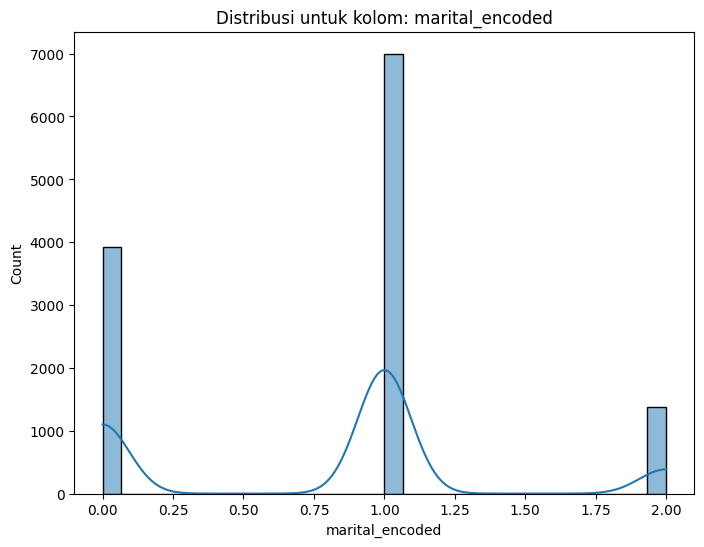

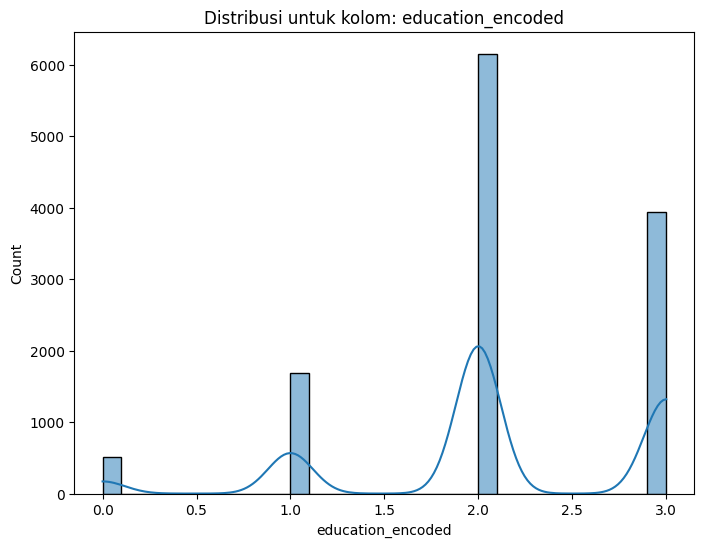

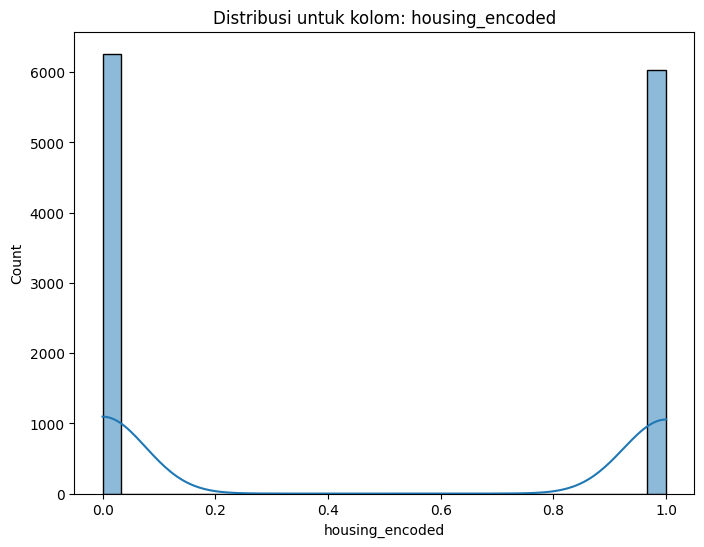

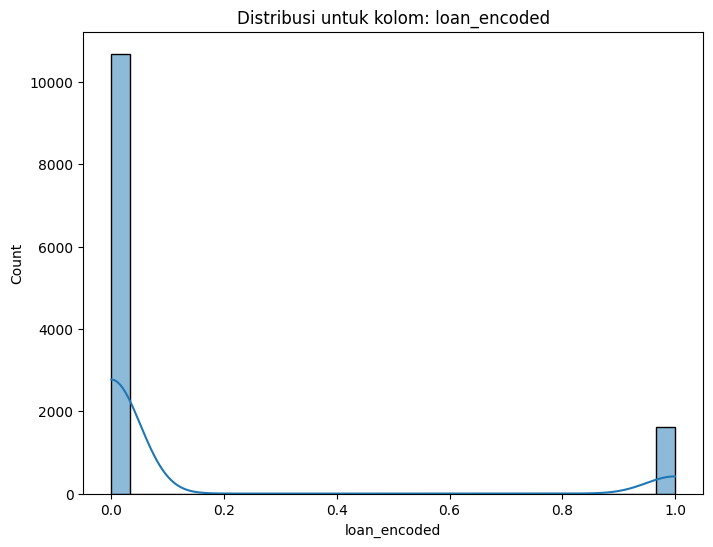

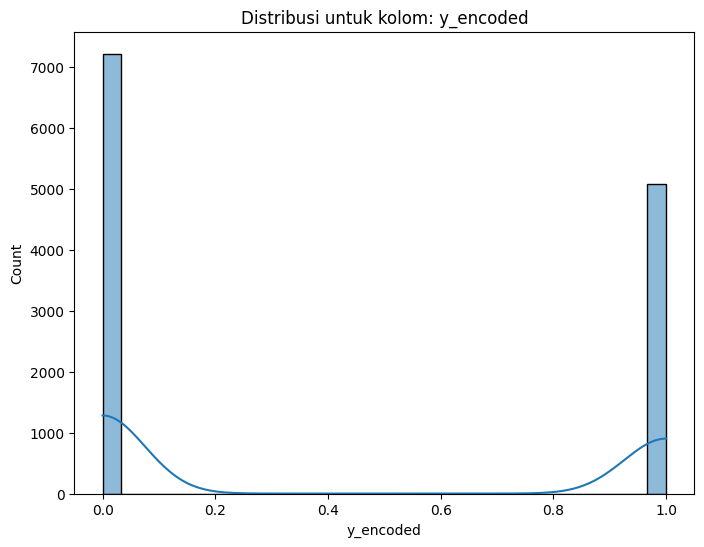

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi dataframe PySpark ke pandas untuk visualisasi

# Visualisasi distribusi untuk setiap kolom numerik
for col in filtered_data:
    plt.figure(figsize=(8, 6))
    sns.histplot(filtered_data[col], kde=True, bins=30)
    plt.title(f"Distribusi untuk kolom: {col}")
    plt.show()


In [54]:
filtered_data.head(5)

,age,balance,duration,campaign,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded,y_encoded
29764,38,581,281,5,6,1,2,1,0,0
5345,36,520,110,2,7,1,2,1,0,0
14918,38,1314,378,2,9,0,3,1,1,0
29952,35,341,348,2,7,0,2,0,1,0
29947,24,99,56,3,5,0,2,0,0,0


Kolom dalam DataFrame: Index(['age', 'balance', 'duration', 'campaign', 'job_encoded',
       'marital_encoded', 'education_encoded', 'housing_encoded',
       'loan_encoded', 'y_encoded'],
      dtype='object')


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26384\1770822823.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=age_df['age'], y=age_df['y_encoded'], ci=None, color='purple')


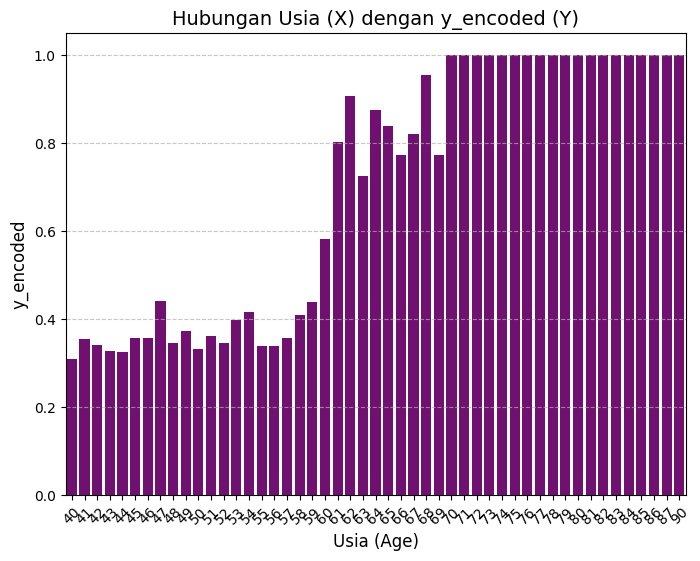

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cek kolom yang ada di DataFrame
print("Kolom dalam DataFrame:", filtered_data.columns)

# Filter data berdasarkan rentang usia 20-50
age_df = filtered_data[(filtered_data['age'] >= 40) & (filtered_data['age'] <= 90)]

# Visualisasi hubungan antara age dan y_encoded
plt.figure(figsize=(8, 6))
sns.barplot(x=age_df['age'], y=age_df['y_encoded'], ci=None, color='purple')
plt.title('Hubungan Usia (X) dengan y_encoded (Y)', fontsize=14)
plt.xlabel('Usia (Age)', fontsize=12)
plt.ylabel('y_encoded', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Untuk memiringkan label usia jika terlalu banyak
plt.show()


In [28]:
filtered_data.head(5)

,age,balance,duration,campaign,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded,y_encoded
29764,38,581,281,5,6,1,2,1,0,0
5345,36,520,110,2,7,1,2,1,0,0
14918,38,1314,378,2,9,0,3,1,1,0
29952,35,341,348,2,7,0,2,0,1,0
29947,24,99,56,3,5,0,2,0,0,0


In [29]:
# Memeriksa apakah ada nilai NaN dalam kolom 'y_encoded'
print(filtered_data['y_encoded'].isna().sum())
# Jika ada NaN, Anda bisa mengisinya dengan nilai tertentu (misalnya dengan mode atau nilai default)
filtered_data['y_encoded'] = filtered_data['y_encoded'].fillna(filtered_data['y_encoded'].mode()[0])  # Mengisi NaN dengan mode


0


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Misalkan df adalah DataFrame pandas yang sudah ada
df = filtered_data.copy()

# Menyiapkan kolom label
df = df.rename(columns={'y_encoded': 'label'})

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali 'label'
y = df['label']  # Kolom target 'label'

# Standarisasi fitur menggunakan StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,age,balance,duration,campaign,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded
23988,31,0,157,2,9,0,2,0,0
44826,41,0,294,4,10,1,3,0,0
6095,43,429,222,4,5,1,2,1,0
22584,53,468,153,6,1,2,2,0,0
35407,32,489,103,2,7,1,2,1,0
...,...,...,...,...,...,...,...,...,...
44495,44,121,412,1,11,1,3,0,0
39631,21,164,260,1,7,0,2,0,0
28447,27,671,243,1,5,0,2,1,0
1737,35,55,79,4,9,1,2,1,0


In [32]:
#X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
#X_scaled_df

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest dengan parameter yang di-tuning
rf = RandomForestClassifier(
    n_estimators=200,            # Jumlah pohon keputusan
    max_depth=10,                # Kedalaman maksimal pohon
    min_samples_split=10,        # Jumlah minimum sampel yang diperlukan untuk membagi node
    min_samples_leaf=4,          # Jumlah minimum sampel di daun
    max_features='sqrt',         # Menggunakan jumlah fitur yang lebih kecil untuk membangun setiap pohon
    random_state=42,             # Untuk hasil yang konsisten
    n_jobs=-1                    # Menggunakan semua core CPU untuk perhitungan paralel
)

# Melatih model menggunakan data training
rf_model = rf.fit(X_train, y_train)

# Melakukan prediksi menggunakan data testing
y_pred = rf_model.predict(X_test)

# Menampilkan laporan evaluasi
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1449
           1       0.92      0.75      0.83      1010

    accuracy                           0.87      2459
   macro avg       0.88      0.85      0.86      2459
weighted avg       0.88      0.87      0.87      2459



In [34]:
import pandas as pd

# Membuat DataFrame baru yang berisi label asli dan hasil prediksi
results_df = pd.DataFrame({
    'Actual Label': y_test,  # Label asli dari data testing
    'Predicted Label': y_pred  # Hasil prediksi dari model
})

# Menampilkan DataFrame hasil
print(results_df.head())


       Actual Label  Predicted Label
29716             0                0
6392              0                0
10956             0                0
44533             0                1
43207             1                0


In [35]:
import numpy as np

# Contoh data baru (harus memiliki jumlah fitur yang sama dengan data pelatihan)
new_data = np.array([[24,400,570,1,4,1,4,0,1],  # Baris pertama data baru
                     [54,550,660,1,4,1,4,0,0]])  # Baris kedua data baru

# Melakukan prediksi langsung menggunakan model yang telah dilatih
predictions = rf_model.predict(new_data)

# Menampilkan hasil prediksi
print("Hasil Prediksi:", predictions)


Hasil Prediksi: [1 1]


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


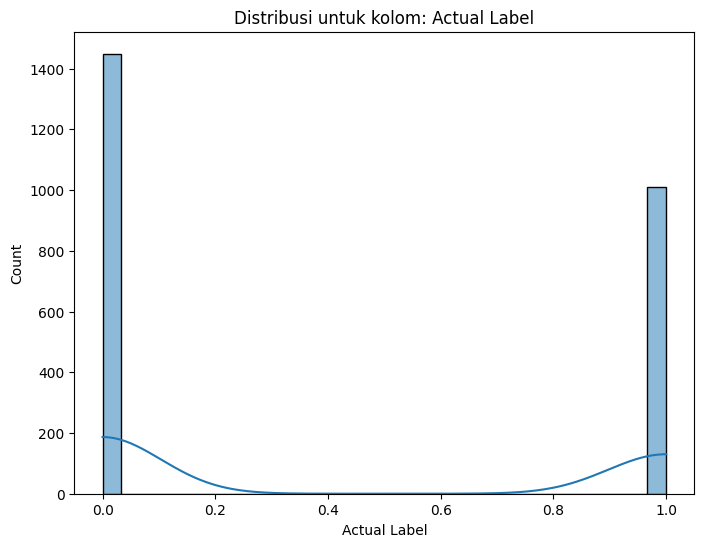

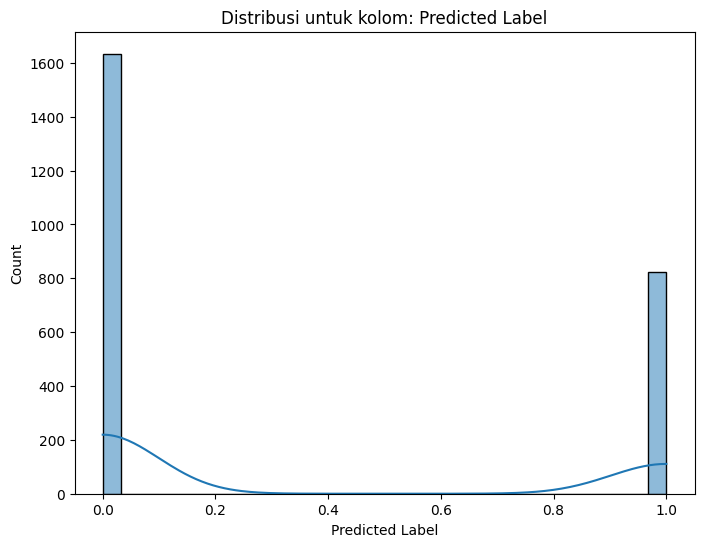

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi dataframe PySpark ke pandas untuk visualisasi

# Visualisasi distribusi untuk setiap kolom numerik
for col in results_df:
    plt.figure(figsize=(8, 6))
    sns.histplot(results_df[col], kde=True, bins=30)
    plt.title(f"Distribusi untuk kolom: {col}")
    plt.show()


In [37]:
import joblib

# Menyimpan model ke file
joblib.dump(rf_model, 'RF_1.joblib')


['RF_1.joblib']